In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
N_sim = int(1e5)

In [4]:
import torch


# Generate parameters alpha (shape) and beta (rate) uniformly in range [0.1, 3]
alpha = torch.rand(N_sim) * (3 - 0.1) + 0.1
beta = torch.rand(N_sim) * (3 - 0.1) + 0.1

# Create the Gamma distribution
gamma_dist = torch.distributions.Gamma(alpha, beta)

# Sample from the distribution
samples = gamma_dist.sample()



In [21]:
alpha.shape, beta.shape

(torch.Size([100000]), torch.Size([100000]))

(0.0, 10.0)

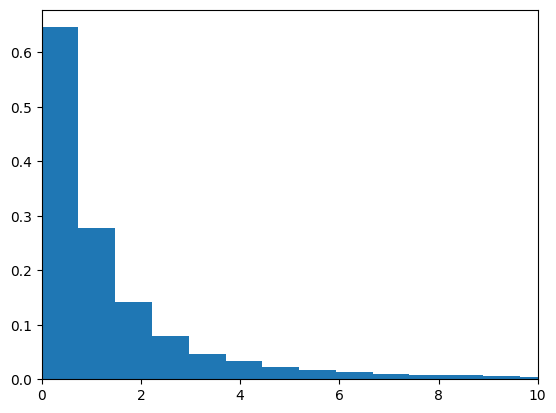

In [7]:
plt.hist(samples.numpy(), bins=100, density=True);
plt.xlim(0,10)

In [9]:
from torch.distributions import Uniform
alpha_dist = Uniform(torch.tensor([0.1]), torch.tensor([3]))    # decision boundary
beta_dist = Uniform(torch.tensor([0.1]), torch.tensor([3]))    # decision boundary
from sbi.utils import MultipleIndependent

prior = MultipleIndependent(
    [
        alpha_dist,
        beta_dist,
    ]
)

In [10]:
from sbi.inference import SNLE
trainer = SNLE(prior = prior)


In [11]:
alpha.shape, beta.shape, samples.shape

(torch.Size([100000]), torch.Size([100000]), torch.Size([100000]))

In [12]:
# merge alpha beta both side by side
theta = torch.cat((alpha.unsqueeze(-1), beta.unsqueeze(-1)), dim=-1)
theta.shape

torch.Size([100000, 2])

In [13]:
x = samples.reshape(-1,1)

In [15]:
print(theta.shape, x.shape)
trainer_1 = trainer.append_simulations(theta=theta,x=x).train()

torch.Size([100000, 2]) torch.Size([100000, 1])


/home/rka/code/ddm_codes/venv/lib/python3.10/site-packages/sbi/neural_nets/net_builders/flow.py:141: UserWarning: In one-dimensional output space, this flow is limited to Gaussians
  x_numel = get_numel(


 Neural network successfully converged after 52 epochs.

In [44]:
test_data = torch.linspace(-5,5, 1000)
test_data_reshape = test_data.reshape(1, -1)
print(test_data_reshape.shape)

torch.Size([1, 1000])


In [45]:
(2*torch.ones((10))).shape

torch.Size([10])

In [46]:
alpha_test = 1; beta_test = 1
# 
alpha_test_arr = alpha_test*torch.ones((1000))
beta_test_arr = beta_test*torch.ones((1000))

# generate gamman dist and sample
gamma_dist_test = torch.distributions.Gamma(alpha_test_arr, beta_test_arr)
samples_test = gamma_dist_test.sample()

# calculate theoretical likelihood of test_data points given alpha and beta
log_prob = gamma_dist_test.log_prob(test_data)

In [47]:
samples_test.shape, log_prob.shape

(torch.Size([1000]), torch.Size([1000]))

Text(0.5, 1.0, 'theoretical likelihood')

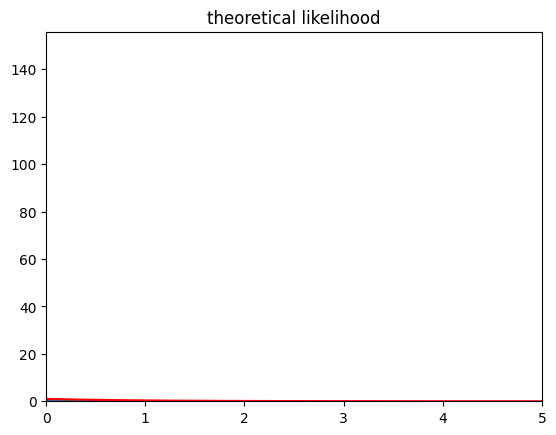

In [51]:
plt.hist(samples_test.numpy(), bins=100, density=True);
plt.plot(test_data, torch.exp(log_prob), 'r')
plt.xlim(0,5)
plt.title('theoretical likelihood')

In [52]:
test_theta = torch.cat((alpha_test_arr.unsqueeze(-1), beta_test_arr.unsqueeze(-1)), dim=-1)
print(test_data.shape, test_theta.shape)
loglike = trainer_1.log_prob(test_data_reshape, test_theta).detach()

torch.Size([1000]) torch.Size([1000, 2])


In [53]:
test_theta, test_data

(tensor([[1., 1.],
         [1., 1.],
         [1., 1.],
         ...,
         [1., 1.],
         [1., 1.],
         [1., 1.]]),
 tensor([-5.0000, -4.9900, -4.9800, -4.9700, -4.9600, -4.9499, -4.9399, -4.9299,
         -4.9199, -4.9099, -4.8999, -4.8899, -4.8799, -4.8699, -4.8599, -4.8498,
         -4.8398, -4.8298, -4.8198, -4.8098, -4.7998, -4.7898, -4.7798, -4.7698,
         -4.7598, -4.7497, -4.7397, -4.7297, -4.7197, -4.7097, -4.6997, -4.6897,
         -4.6797, -4.6697, -4.6597, -4.6496, -4.6396, -4.6296, -4.6196, -4.6096,
         -4.5996, -4.5896, -4.5796, -4.5696, -4.5596, -4.5495, -4.5395, -4.5295,
         -4.5195, -4.5095, -4.4995, -4.4895, -4.4795, -4.4695, -4.4595, -4.4494,
         -4.4394, -4.4294, -4.4194, -4.4094, -4.3994, -4.3894, -4.3794, -4.3694,
         -4.3594, -4.3493, -4.3393, -4.3293, -4.3193, -4.3093, -4.2993, -4.2893,
         -4.2793, -4.2693, -4.2593, -4.2492, -4.2392, -4.2292, -4.2192, -4.2092,
         -4.1992, -4.1892, -4.1792, -4.1692, -4.1592, -4.149

Text(0.5, 1.0, 'gamma distr')

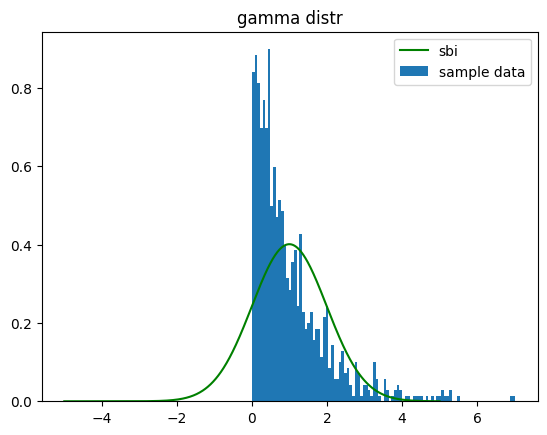

In [56]:
# plt.plot(test_data, torch.exp(log_prob), 'r', label='theory')
plt.plot(test_data, torch.exp(loglike).squeeze().numpy(), 'g', label='sbi')
plt.hist(samples_test.numpy(), bins=100, density=True, label='sample data');
plt.legend()
plt.title('gamma distr')

Text(0.5, 1.0, 'gamma distr')

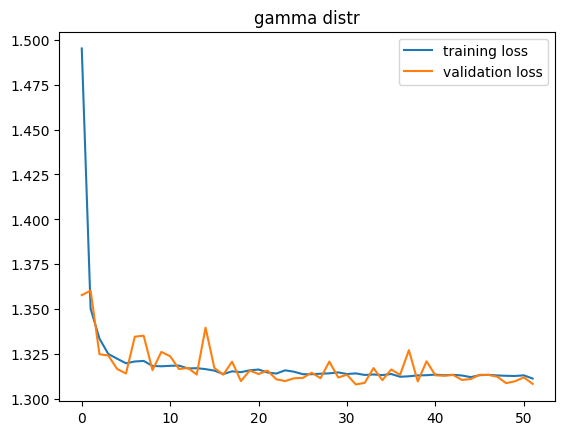

In [58]:
plt.plot(trainer._summary['training_loss'], label='training loss')
plt.plot(trainer._summary['validation_loss'], label='validation loss');
plt.legend()
plt.title('gamma distr')
